In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We are going to analyze the top players in the NBA and see how important their size is relative to their position and try to answer the question "How important is size in the NBA?" Instead of looking at strictly height, we're going to account body weight into the equation as well by calculating the BMI's of the players. This will also control for discrepancies in height between positions. Because the NBA is a professional sports league made up of professional athletes, I'm going to wager that it is safe to assume that any high BMI's are indicative of strength rather than obesity. Our database doesn't have heights and weights so I'm going to first filter through the data to get the sample that we want (the top offensive players based on points and offensive rating). Then I'm going to save the smaller sample to an excel file and manually input the data for calculating BMI.

In [196]:
nba_df = pd.read_excel(r'C:\Users\alper\Downloads\NBASizeAnalysis.xlsx')

In [197]:
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,1,Steven Adams,C,26,OKC,34,34,962,8.6,14.1,...,11.3,17.8,4.7,1.1,2.0,2.6,3.4,20.6,125.0,105
1,2,Bam Adebayo,C,22,MIA,36,36,1240,8.4,14.4,...,11.3,15.0,6.3,1.9,1.7,4.1,3.8,22.1,117.0,103
2,3,LaMarcus Aldridge,C,34,SAS,33,33,1089,11.1,21.8,...,8.1,11.2,3.5,0.8,2.7,1.9,3.4,27.9,118.0,111
3,4,Nickeil Alexander-Walker,SG,21,NOP,28,0,356,7.5,21.9,...,7.3,7.9,6.3,1.2,0.5,3.5,4.3,20.3,90.0,114
4,5,Grayson Allen,SG,24,MEM,23,0,388,7.6,17.1,...,5.8,6.1,3.7,0.6,0.1,2.4,3.8,21.5,108.0,116


In [198]:
nba_df.set_index(['Rk']) # Rk serves as index in this database

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,Fgperc,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
Rk,,,,,,,,,,,,,,,,,,,,,
1,Steven Adams,C,26,OKC,34,34,962,8.6,14.1,0.610,...,11.3,17.8,4.7,1.1,2.0,2.6,3.4,20.6,125.0,105
2,Bam Adebayo,C,22,MIA,36,36,1240,8.4,14.4,0.580,...,11.3,15.0,6.3,1.9,1.7,4.1,3.8,22.1,117.0,103
3,LaMarcus Aldridge,C,34,SAS,33,33,1089,11.1,21.8,0.509,...,8.1,11.2,3.5,0.8,2.7,1.9,3.4,27.9,118.0,111
4,Nickeil Alexander-Walker,SG,21,NOP,28,0,356,7.5,21.9,0.341,...,7.3,7.9,6.3,1.2,0.5,3.5,4.3,20.3,90.0,114
5,Grayson Allen,SG,24,MEM,23,0,388,7.6,17.1,0.441,...,5.8,6.1,3.7,0.6,0.1,2.4,3.8,21.5,108.0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,Thaddeus Young,PF,31,CHI,36,0,786,7.7,19.3,0.399,...,6.5,9.8,4.1,2.4,0.6,3.2,4.0,19.1,95.0,106
475,Trae Young,PG,21,ATL,34,34,1195,12.4,27.6,0.448,...,5.1,5.7,11.2,1.6,0.1,6.4,2.2,38.4,111.0,115
476,Cody Zeller,C,27,CHO,36,20,834,9.5,17.6,0.542,...,9.4,15.7,2.5,1.3,0.9,3.1,5.5,24.9,118.0,112


Here's the basis for what players we will select:
Because the pace in today's NBA varies greatly from team to team (e.g. the Bucks lead the league with 104.65 possessions per game while the Hornets have 97.41), we're going to use per 100 possession stats to control for that factor. This will help us better analyze individual player abilities. But per 100 possession stats with small sample sizes are very unreliable so we're going to control for that by ensuring that all players in consideration have played at least 25 games.

In [199]:
nba_df = nba_df[nba_df.G > 25]

Now because a player with less possessions could skew the data (for example Tacko Fall averages 57 points per 100 possessions because he has played 11 minutes all season) , we're going to control for that by taking only the players in the top 50th percentile in minutes. I don't think there'd be a single top player (who isn't injured) in the league who would fall in the bottom 50th percentile of minutes so I am not worried about accidentally disregarding a player that should be considered.

In [200]:
nba_df = nba_df[nba_df.MP > nba_df.MP.quantile(.5)]

We want to look at the top offensive players in the league. We take the top twentieth percentile of scorers per 100 possessions.

In [201]:
top_scorers = nba_df[nba_df.PTS > nba_df.PTS.quantile(.8)]

In [202]:
top_scorers = top_scorers.sort_values(by = 'PTS', ascending = False)
top_scorers.reset_index()

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,182,183,James Harden,SG,30,HOU,34,34,1280,13.9,...,6.1,7.4,9.3,2.2,1.0,5.8,4.0,47.3,125.0,108
1,11,12,Giannis Antetokounmpo,PF,25,MIL,35,35,1084,16.5,...,15.3,19.0,8.3,1.9,1.7,5.1,4.6,44.9,118.0,97
2,125,126,Luka Dončić,PG,20,DAL,32,32,1049,14.2,...,12.2,14.4,13.2,1.8,0.2,6.2,3.5,43.9,121.0,107
3,474,475,Trae Young,PG,21,ATL,34,34,1195,12.4,...,5.1,5.7,11.2,1.6,0.1,6.4,2.2,38.4,111.0,115
4,273,274,Kawhi Leonard,SF,28,LAC,28,28,893,12.9,...,9.5,11.1,7.5,2.7,0.8,4.9,2.9,37.0,110.0,103
5,114,115,Anthony Davis,PF,26,LAL,35,35,1231,12.8,...,9.7,12.8,4.4,2.1,3.5,3.3,3.5,36.8,120.0,99
6,136,137,Joel Embiid,C,25,PHI,31,31,963,11.9,...,15.2,19.1,5.1,1.3,2.1,4.7,5.5,36.3,114.0,102
7,33,34,Bradley Beal,SG,26,WAS,31,31,1130,12.1,...,4.7,6.1,8.5,1.4,0.4,4.2,3.1,35.6,111.0,118
8,276,277,Damian Lillard,PG,29,POR,36,36,1328,10.8,...,4.8,5.4,9.8,1.3,0.5,3.6,2.4,34.7,122.0,114
9,318,319,Donovan Mitchell,SG,23,UTA,36,36,1261,12.9,...,5.2,6.2,6.1,1.5,0.4,3.4,3.3,34.4,110.0,108


This list seems accurate for the most part. It has big name scorers like James Harden and LeBron James as well as lesser known players who are great scorers such as Lou Williams, Khris Middleton, and Bojan Bogdonavic. There's also 27 players so our sample size isn't incredibly small. Now I will export this dataframe to excel and manually input the height and weight of the players in order to calculate their BMI's. 

In [203]:
# writer = pd.ExcelWriter('top_scorers.xlsx', engine = 'xlsxwriter')
# top_scorers.to_excel(writer, sheet_name = 'Sheet')
# writer.save()
# they are notes now so that it doesn't try to save a new excel spreadsheet everytime I run the cells

In [204]:
top_scorers = pd.read_excel(r'C:\Users\alper\top_scorers.xlsx')

In [205]:
top_scorers

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,TOV,PF,PTS,ORtg,DRtg,lbWeight,kgWeight,inHeight,mHeight,BMI
0,186,183,James Harden,SG,30,HOU,34,34,1280,13.9,...,5.8,4.0,47.3,125,108,220,99.660,77,1.9558,26.053855
1,11,12,Giannis Antetokounmpo,PF,25,MIL,35,35,1084,16.5,...,5.1,4.6,44.9,118,97,242,109.626,83,2.1082,24.665502
2,127,126,Luka Dončić,PG,20,DAL,32,32,1049,14.2,...,6.2,3.5,43.9,121,107,230,104.190,79,2.0066,25.876434
3,478,475,Trae Young,PG,21,ATL,34,34,1195,12.4,...,6.4,2.2,38.4,111,115,181,81.993,74,1.8796,23.208438
4,277,274,Kawhi Leonard,SF,28,LAC,28,28,893,12.9,...,4.9,2.9,37.0,110,103,229,103.737,79,2.0066,25.763928
5,116,115,Anthony Davis,PF,26,LAL,35,35,1231,12.8,...,3.3,3.5,36.8,120,99,254,115.062,82,2.0828,26.523863
6,138,137,Joel Embiid,C,25,PHI,31,31,963,11.9,...,4.7,5.5,36.3,114,102,249,112.797,84,2.1336,24.778302
7,33,34,Bradley Beal,SG,26,WAS,31,31,1130,12.1,...,4.2,3.1,35.6,111,118,207,93.771,77,1.9558,24.514309
8,280,277,Damian Lillard,PG,29,POR,36,36,1328,10.8,...,3.6,2.4,34.7,122,114,194,87.882,74,1.8796,24.875342
9,226,223,Brandon Ingram,PF,22,NOP,33,33,1128,12.2,...,4.0,4.1,34.4,113,112,190,86.070,79,2.0066,21.376184


I manually inputted the height and weight of the players in inches and pounds and then converted them to metres and kilograms in excel and then used excel to create the BMI column. 

In [206]:
bmi_and_pts = top_scorers[['Player', 'PTS', 'BMI']]

In [207]:
bmi_and_pts.corr()

,PTS,BMI
PTS,1.000000,0.313509
BMI,0.313509,1.000000


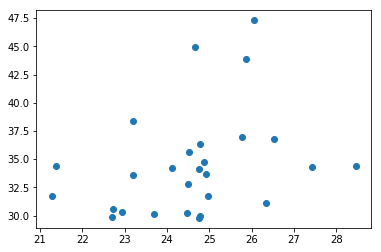

In [208]:
bmi = top_scorers.BMI
pts = top_scorers.PTS
plt.scatter(bmi, pts)
plt.show()

It's pretty clear that there is little to no correlation between BMI and points scored per 100 possessions for the top scorers. I wonder how the BMI's of the top scorers compare to that of the rest of the league though. I couldn't possibly manually input the height and weight of each player in the NBA, mainly because I don't want to, but thankfully I found a dataset on foxsports.com that had each player's height and weight. 

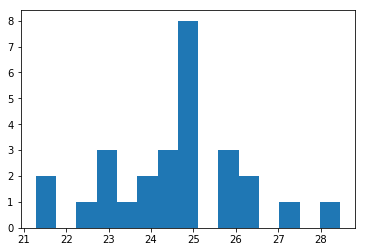

In [209]:
plt.hist(bmi, bins=15)
plt.show()

I generated the histogram for absolutely no reason other than I just wanted to see it.

In [210]:
weight_and_height_df = pd.read_excel(r'C:\Users\alper\Downloads\playerheightandweight.xlsx')
nba_players_df = pd.read_excel(r'C:\Users\alper\Downloads\NBASizeAnalysis.xlsx') 
weight_and_height_df

,First Name,Last Name,Player,Team,Position,Height,Weight,Birthdate
0,Adams,Jalen,Jalen Adams,NOP,PG,"6'3""",195,1995-12-11 00:00:00
1,Adams,Jaylen,Jaylen Adams,MIL,PG,"6'2""",190,1996-05-04 00:00:00
2,Adams,Steven,Steven Adams,OKC,C,"6'11""",265,1993-07-20 00:00:00
3,Adebayo,Bam,Bam Adebayo,MIA,C,"6'9""",255,1997-07-18 00:00:00
4,Adel,Deng,Deng Adel,BKN,SF,"6'7""",200,1997-02-01 00:00:00
...,...,...,...,...,...,...,...,...
650,Young,Trae,Trae Young,ATL,PG,"6'1""",180,1998-09-19 00:00:00
651,Zeller,Cody,Cody Zeller,CHA,PF,"7'0""",240,1992-10-05 00:00:00
652,Zeller,Tyler,Tyler Zeller,DEN,C,"7'0""",253,1990-01-17 00:00:00
653,Zizic,Ante,Ante Zizic,CLE,C,"6'10""",266,1997-01-04 00:00:00


There's a first name and last name column because the names in the dataset came as "Last Name, First Name" so I had to pull out some Excel shenanigans to get them in the same format as the names in nba_players_df, so I'm going to delete those columns first as well as Birthdate, Position, and Team because I don't need those.

The weight_and_height_df has 656 rows while the nba_players_df has like 400. I think this is because the weight_and_height_df included two way players and players that may be stashed overseas so I'm going to get rid of the players in weight_and_height_df that are not in nba_players_df. 

nba_players_df is the same file as nba_df but I needed to get a new copy because I messed around with nba_df a bunch already.

In [211]:
del weight_and_height_df['First Name']
del weight_and_height_df['Last Name']
del weight_and_height_df['Birthdate']
del weight_and_height_df['Team']
del weight_and_height_df['Position']

In [212]:
weight_and_height_df

,Player,Height,Weight
0,Jalen Adams,"6'3""",195
1,Jaylen Adams,"6'2""",190
2,Steven Adams,"6'11""",265
3,Bam Adebayo,"6'9""",255
4,Deng Adel,"6'7""",200
...,...,...,...
650,Trae Young,"6'1""",180
651,Cody Zeller,"7'0""",240
652,Tyler Zeller,"7'0""",253
653,Ante Zizic,"6'10""",266


Nice.

In [213]:
weight_and_height_df = weight_and_height_df[weight_and_height_df.Player.isin(nba_players_df.Player)]

In [214]:
weight_and_height_df.reset_index()

,index,Player,Height,Weight
0,2,Steven Adams,"6'11""",265
1,3,Bam Adebayo,"6'9""",255
2,6,LaMarcus Aldridge,"6'11""",250
3,8,Nickeil Alexander-Walker,"6'5""",205
4,9,Grayson Allen,"6'4""",198
...,...,...,...,...
440,646,Delon Wright,"6'5""",185
441,649,Thaddeus Young,"6'8""",235
442,650,Trae Young,"6'1""",180
443,651,Cody Zeller,"7'0""",240


nba_players_df has more rows because some of the names in weight_and_height_df are spelled differently. I think the loss of 36 players won't affect the data too much as our sample size is still 446. Also I really do not want to go through every name and figure out which players got removed. Now I'm going to remove all names of nba_players_df that arent in weight_and_height_df. This will make the lists of names the same since they are both in alphabetical order.

In [215]:
shortened_nba_players = nba_players_df[nba_players_df.Player.isin(weight_and_height_df.Player)]

In [216]:
shortened_nba_players.reset_index()

,index,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg
0,0,1,Steven Adams,C,26,OKC,34,34,962,8.6,...,11.3,17.8,4.7,1.1,2.0,2.6,3.4,20.6,125.0,105
1,1,2,Bam Adebayo,C,22,MIA,36,36,1240,8.4,...,11.3,15.0,6.3,1.9,1.7,4.1,3.8,22.1,117.0,103
2,2,3,LaMarcus Aldridge,C,34,SAS,33,33,1089,11.1,...,8.1,11.2,3.5,0.8,2.7,1.9,3.4,27.9,118.0,111
3,3,4,Nickeil Alexander-Walker,SG,21,NOP,28,0,356,7.5,...,7.3,7.9,6.3,1.2,0.5,3.5,4.3,20.3,90.0,114
4,4,5,Grayson Allen,SG,24,MEM,23,0,388,7.6,...,5.8,6.1,3.7,0.6,0.1,2.4,3.8,21.5,108.0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,472,473,Delon Wright,SG,27,DAL,34,2,690,6.7,...,6.3,8.4,7.7,3.2,0.8,1.9,2.8,18.1,129.0,106
441,473,474,Thaddeus Young,PF,31,CHI,36,0,786,7.7,...,6.5,9.8,4.1,2.4,0.6,3.2,4.0,19.1,95.0,106
442,474,475,Trae Young,PG,21,ATL,34,34,1195,12.4,...,5.1,5.7,11.2,1.6,0.1,6.4,2.2,38.4,111.0,115
443,475,476,Cody Zeller,C,27,CHO,36,20,834,9.5,...,9.4,15.7,2.5,1.3,0.9,3.1,5.5,24.9,118.0,112


In [217]:
hw_cols = weight_and_height_df.iloc[:, 1:3]

In [218]:
shortened_nba_players = shortened_nba_players.join(hw_cols.set_index(shortened_nba_players.index))
shortened_nba_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Height,Weight
0,1,Steven Adams,C,26,OKC,34,34,962,8.6,14.1,...,4.7,1.1,2.0,2.6,3.4,20.6,125.0,105,"6'11""",265
1,2,Bam Adebayo,C,22,MIA,36,36,1240,8.4,14.4,...,6.3,1.9,1.7,4.1,3.8,22.1,117.0,103,"6'9""",255
2,3,LaMarcus Aldridge,C,34,SAS,33,33,1089,11.1,21.8,...,3.5,0.8,2.7,1.9,3.4,27.9,118.0,111,"6'11""",250
3,4,Nickeil Alexander-Walker,SG,21,NOP,28,0,356,7.5,21.9,...,6.3,1.2,0.5,3.5,4.3,20.3,90.0,114,"6'5""",205
4,5,Grayson Allen,SG,24,MEM,23,0,388,7.6,17.1,...,3.7,0.6,0.1,2.4,3.8,21.5,108.0,116,"6'4""",198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,Delon Wright,SG,27,DAL,34,2,690,6.7,13.5,...,7.7,3.2,0.8,1.9,2.8,18.1,129.0,106,"6'5""",185
473,474,Thaddeus Young,PF,31,CHI,36,0,786,7.7,19.3,...,4.1,2.4,0.6,3.2,4.0,19.1,95.0,106,"6'8""",235
474,475,Trae Young,PG,21,ATL,34,34,1195,12.4,27.6,...,11.2,1.6,0.1,6.4,2.2,38.4,111.0,115,"6'1""",180
475,476,Cody Zeller,C,27,CHO,36,20,834,9.5,17.6,...,2.5,1.3,0.9,3.1,5.5,24.9,118.0,112,"7'0""",240


Sweet. Now we have to convert the height from ft'in'' to metres in order to calculate BMI. Then we will convert lbs to kgs.

In [219]:
def str_to_metres(string):
    feet = int(string[0])
    left = '\''
    right = '\"'
    inches = int(string[string.index(left) + 1:string.index(right)])
    total_inches = feet * 12 + inches
    metres = total_inches * .0254
    return metres

In [220]:
height_col = shortened_nba_players['Height']
height_col = height_col.apply(lambda x: str_to_metres(x))

In [221]:
shortened_nba_players['mHeight'] = height_col

In [222]:
def lbs_to_kgs(lbs):
    return lbs * 0.454

In [223]:
weight_col = shortened_nba_players['Weight']
weight_col = weight_col.apply(lambda x: lbs_to_kgs(x))

In [224]:
shortened_nba_players['kgWeight'] = weight_col

Now we write a function to calculate BMI and apply it to all players.

In [225]:
def calcBMI(metres, kgs):
    return kgs / metres ** 2

In [226]:
wh_cols = shortened_nba_players[['mHeight', 'kgWeight']]

In [227]:
bmi_col = np.divide(shortened_nba_players['kgWeight'], shortened_nba_players['mHeight'] ** 2)

In [228]:
shortened_nba_players['BMI'] = bmi_col

In [229]:
shortened_nba_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV,PF,PTS,ORtg,DRtg,Height,Weight,mHeight,kgWeight,BMI
0,1,Steven Adams,C,26,OKC,34,34,962,8.6,14.1,...,2.6,3.4,20.6,125.0,105,"6'11""",265,2.1082,120.310,27.069368
1,2,Bam Adebayo,C,22,MIA,36,36,1240,8.4,14.4,...,4.1,3.8,22.1,117.0,103,"6'9""",255,2.0574,115.770,27.350078
2,3,LaMarcus Aldridge,C,34,SAS,33,33,1089,11.1,21.8,...,1.9,3.4,27.9,118.0,111,"6'11""",250,2.1082,113.500,25.537139
3,4,Nickeil Alexander-Walker,SG,21,NOP,28,0,356,7.5,21.9,...,3.5,4.3,20.3,90.0,114,"6'5""",205,1.9558,93.070,24.331049
4,5,Grayson Allen,SG,24,MEM,23,0,388,7.6,17.1,...,2.4,3.8,21.5,108.0,116,"6'4""",198,1.9304,89.892,24.122728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,473,Delon Wright,SG,27,DAL,34,2,690,6.7,13.5,...,1.9,2.8,18.1,129.0,106,"6'5""",185,1.9558,83.990,21.957288
473,474,Thaddeus Young,PF,31,CHI,36,0,786,7.7,19.3,...,3.2,4.0,19.1,95.0,106,"6'8""",235,2.0320,106.690,25.839036
474,475,Trae Young,PG,21,ATL,34,34,1195,12.4,27.6,...,6.4,2.2,38.4,111.0,115,"6'1""",180,1.8542,81.720,23.769235
475,476,Cody Zeller,C,27,CHO,36,20,834,9.5,17.6,...,3.1,5.5,24.9,118.0,112,"7'0""",240,2.1336,108.960,23.935422


In order to properly compare the rest of the league with the top scorers, we have to get rid of the top scorers in this dataframe.

In [230]:
shortened_nba_players = shortened_nba_players[~shortened_nba_players.Player.isin(top_scorers.Player)]

In [231]:
shortened_nba_players = shortened_nba_players[shortened_nba_players.MP > shortened_nba_players.MP.quantile(.3)]

In [232]:
shortened_nba_players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV,PF,PTS,ORtg,DRtg,Height,Weight,mHeight,kgWeight,BMI
0,1,Steven Adams,C,26,OKC,34,34,962,8.6,14.1,...,2.6,3.4,20.6,125.0,105,"6'11""",265,2.1082,120.310,27.069368
1,2,Bam Adebayo,C,22,MIA,36,36,1240,8.4,14.4,...,4.1,3.8,22.1,117.0,103,"6'9""",255,2.0574,115.770,27.350078
2,3,LaMarcus Aldridge,C,34,SAS,33,33,1089,11.1,21.8,...,1.9,3.4,27.9,118.0,111,"6'11""",250,2.1082,113.500,25.537139
3,4,Nickeil Alexander-Walker,SG,21,NOP,28,0,356,7.5,21.9,...,3.5,4.3,20.3,90.0,114,"6'5""",205,1.9558,93.070,24.331049
4,5,Grayson Allen,SG,24,MEM,23,0,388,7.6,17.1,...,2.4,3.8,21.5,108.0,116,"6'4""",198,1.9304,89.892,24.122728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,472,Christian Wood,PF,24,DET,34,1,565,9.7,16.6,...,2.8,3.2,27.4,123.0,110,"6'10""",214,2.0828,97.156,22.396208
472,473,Delon Wright,SG,27,DAL,34,2,690,6.7,13.5,...,1.9,2.8,18.1,129.0,106,"6'5""",185,1.9558,83.990,21.957288
473,474,Thaddeus Young,PF,31,CHI,36,0,786,7.7,19.3,...,3.2,4.0,19.1,95.0,106,"6'8""",235,2.0320,106.690,25.839036
475,476,Cody Zeller,C,27,CHO,36,20,834,9.5,17.6,...,3.1,5.5,24.9,118.0,112,"7'0""",240,2.1336,108.960,23.935422


In [233]:
top_scorers

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,TOV,PF,PTS,ORtg,DRtg,lbWeight,kgWeight,inHeight,mHeight,BMI
0,186,183,James Harden,SG,30,HOU,34,34,1280,13.9,...,5.8,4.0,47.3,125,108,220,99.660,77,1.9558,26.053855
1,11,12,Giannis Antetokounmpo,PF,25,MIL,35,35,1084,16.5,...,5.1,4.6,44.9,118,97,242,109.626,83,2.1082,24.665502
2,127,126,Luka Dončić,PG,20,DAL,32,32,1049,14.2,...,6.2,3.5,43.9,121,107,230,104.190,79,2.0066,25.876434
3,478,475,Trae Young,PG,21,ATL,34,34,1195,12.4,...,6.4,2.2,38.4,111,115,181,81.993,74,1.8796,23.208438
4,277,274,Kawhi Leonard,SF,28,LAC,28,28,893,12.9,...,4.9,2.9,37.0,110,103,229,103.737,79,2.0066,25.763928
5,116,115,Anthony Davis,PF,26,LAL,35,35,1231,12.8,...,3.3,3.5,36.8,120,99,254,115.062,82,2.0828,26.523863
6,138,137,Joel Embiid,C,25,PHI,31,31,963,11.9,...,4.7,5.5,36.3,114,102,249,112.797,84,2.1336,24.778302
7,33,34,Bradley Beal,SG,26,WAS,31,31,1130,12.1,...,4.2,3.1,35.6,111,118,207,93.771,77,1.9558,24.514309
8,280,277,Damian Lillard,PG,29,POR,36,36,1328,10.8,...,3.6,2.4,34.7,122,114,194,87.882,74,1.8796,24.875342
9,226,223,Brandon Ingram,PF,22,NOP,33,33,1128,12.2,...,4.0,4.1,34.4,113,112,190,86.070,79,2.0066,21.376184


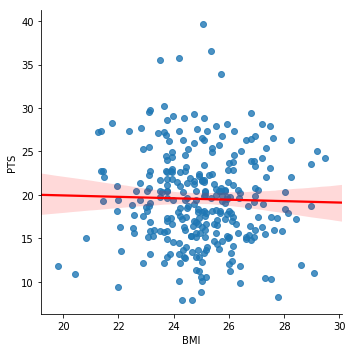

In [234]:
sns.lmplot(x='BMI', y='PTS', data=shortened_nba_players, fit_reg=True, line_kws = {'color': 'Red'})

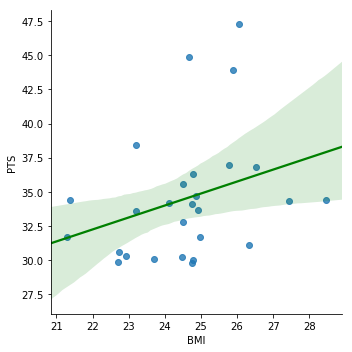

In [235]:
sns.lmplot(x='BMI', y='PTS', data=top_scorers, fit_reg=True, line_kws={'color': 'Green'})

In [236]:
top_scorers_bmi_and_pts = pd.DataFrame({'Top Scorers Pts': top_scorers['PTS'], 'Top Scorers BMI': top_scorers['BMI']})

In [237]:
other_players_bmi_and_pts = pd.DataFrame({'Other Players Pts': shortened_nba_players['PTS'], 'Other Players BMI': shortened_nba_players['BMI']})

In [238]:
top_scorers_bmi_and_pts.corr()

,Top Scorers Pts,Top Scorers BMI
Top Scorers Pts,1.000000,0.313509
Top Scorers BMI,0.313509,1.000000


In [239]:
other_players_bmi_and_pts.corr()

,Other Players Pts,Other Players BMI
Other Players Pts,1.000000,-0.025224
Other Players BMI,-0.025224,1.000000


It is clear that there is no correlation between BMI and Points Per 100 Possessions in the population that contains no top scorers. It seems possible that there could be a slight correlation in the top scorers, although our sample size may be too small to say definitely. To get a more definite answer, it might help to analyze NBA player populations through the entirety of the NBA's history rather than one season.